In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Show the first few rows of the dataset
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


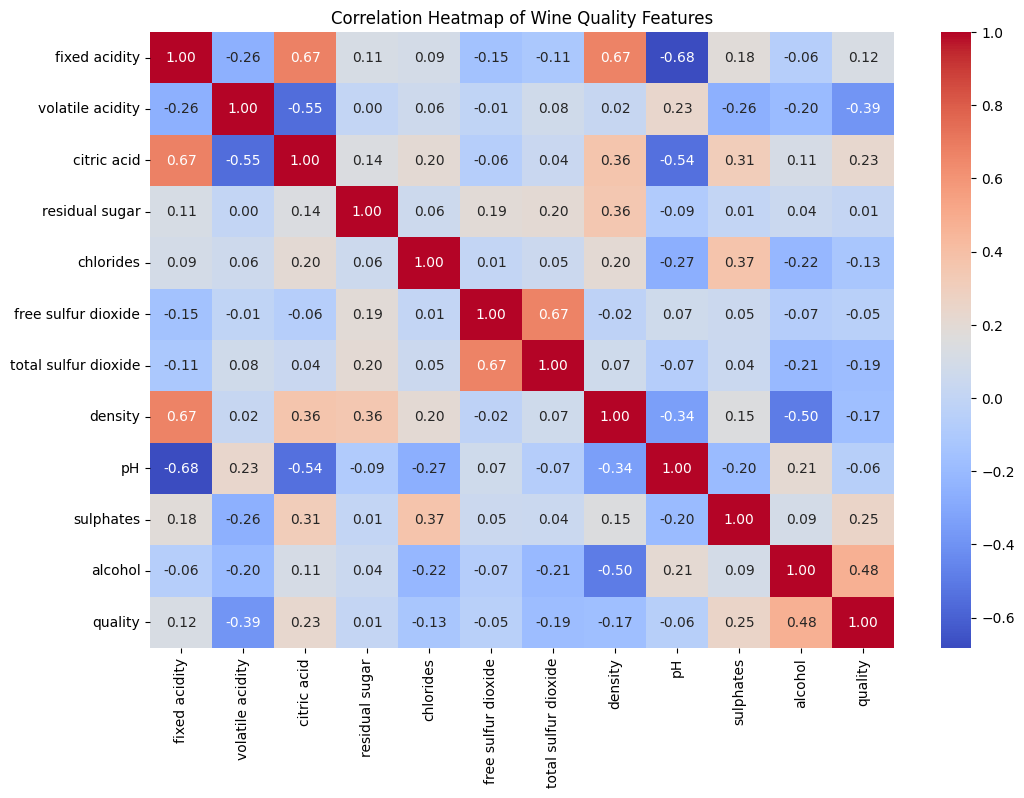

In [2]:
# Summary statistics
df.describe()

# Correlation heatmap to understand relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Quality Features')
plt.savefig('Correlation.png')
plt.show()


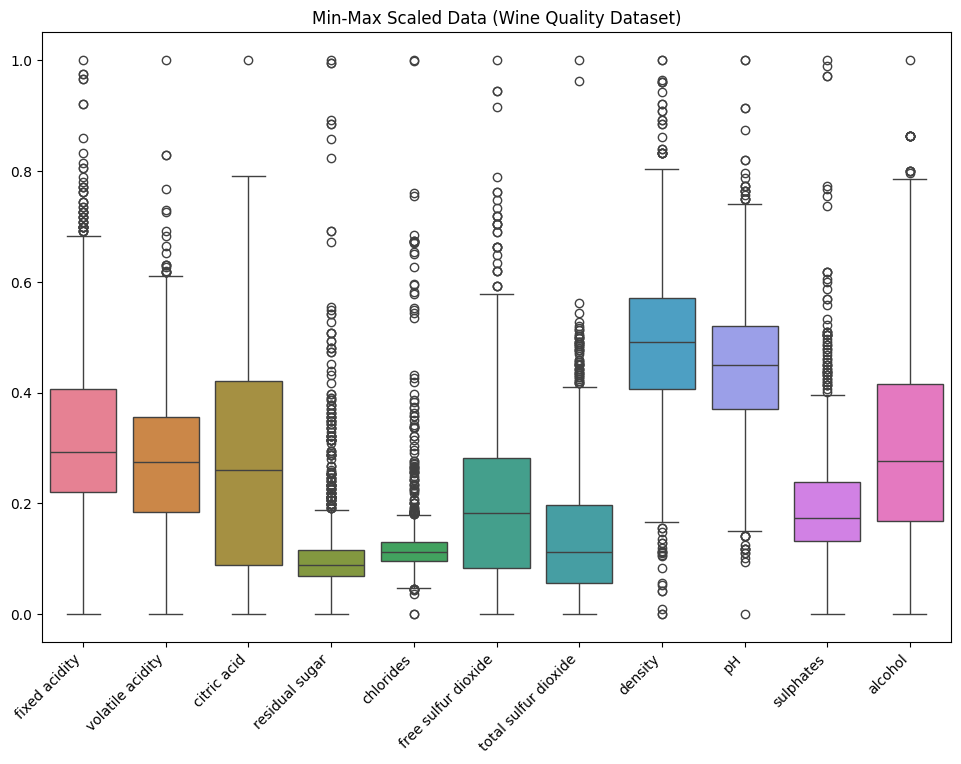

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data (excluding the target 'quality')
scaled_data = scaler.fit_transform(df.drop('quality', axis=1))

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])

# Plot the scaled data
plt.figure(figsize=(10, 8))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=45, ha='right')
plt.title('Min-Max Scaled Data (Wine Quality Dataset)')
plt.tight_layout(pad=2)  # Add padding to ensure the labels are not cut off

plt.savefig('MinMax.png')
plt.show()


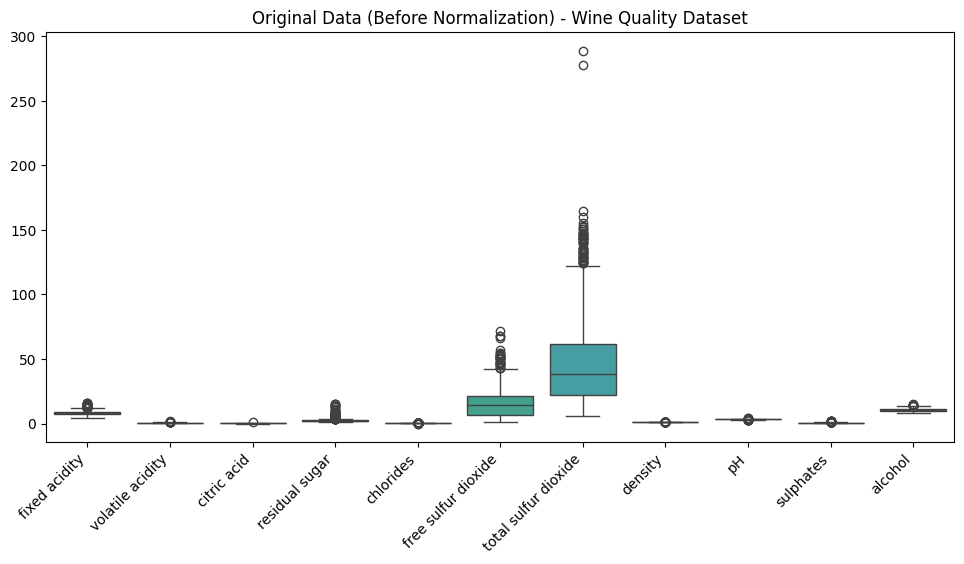

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('quality', axis=1))
plt.xticks(rotation=45, ha='right')  # Tilt the column names for readability
plt.title('Original Data (Before Normalization) - Wine Quality Dataset')
plt.tight_layout(pad=2)  # Add padding to prevent labels from being cut off
plt.savefig("original_data_no_function.png")
plt.show()  # Display the plot


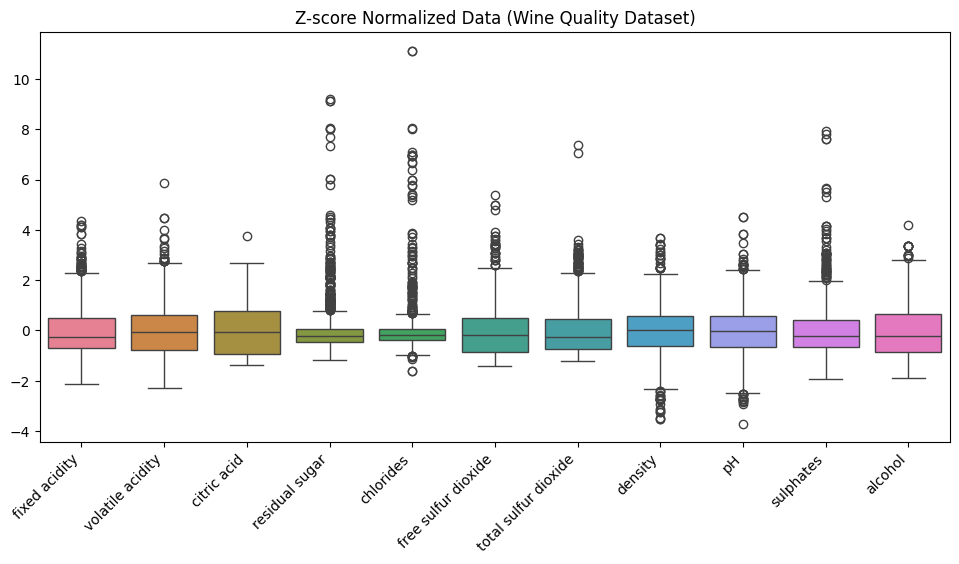

In [5]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
z_scaled_data = scaler.fit_transform(df.drop('quality', axis=1))

# Convert to DataFrame
z_scaled_df = pd.DataFrame(z_scaled_data, columns=df.columns[:-1])

# Plot the Z-score normalized data
plt.figure(figsize=(10, 6))
sns.boxplot(data=z_scaled_df)
plt.xticks(rotation=45, ha='right')
plt.title('Z-score Normalized Data (Wine Quality Dataset)')
plt.tight_layout(pad=2)  # Add padding to ensure the labels are not cut off

plt.savefig('Zscore.png')
plt.show()


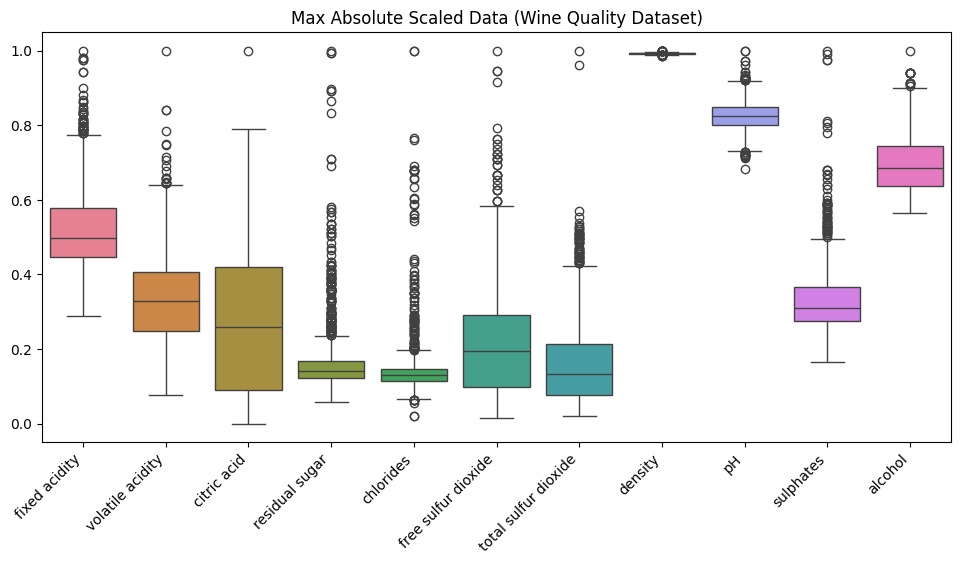

In [6]:
from sklearn.preprocessing import MaxAbsScaler

# Create a MaxAbsScaler object
scaler = MaxAbsScaler()

# Fit and transform the data
maxabs_scaled_data = scaler.fit_transform(df.drop('quality', axis=1))

# Convert to DataFrame
maxabs_scaled_df = pd.DataFrame(maxabs_scaled_data, columns=df.columns[:-1])

# Plot the Max Abs Scaled data
plt.figure(figsize=(10, 6))
sns.boxplot(data=maxabs_scaled_df)
plt.xticks(rotation=45, ha='right')
plt.title('Max Absolute Scaled Data (Wine Quality Dataset)')
plt.tight_layout(pad=2)  # Add padding to ensure the labels are not cut off

plt.savefig('Maxabs.png')
plt.show()


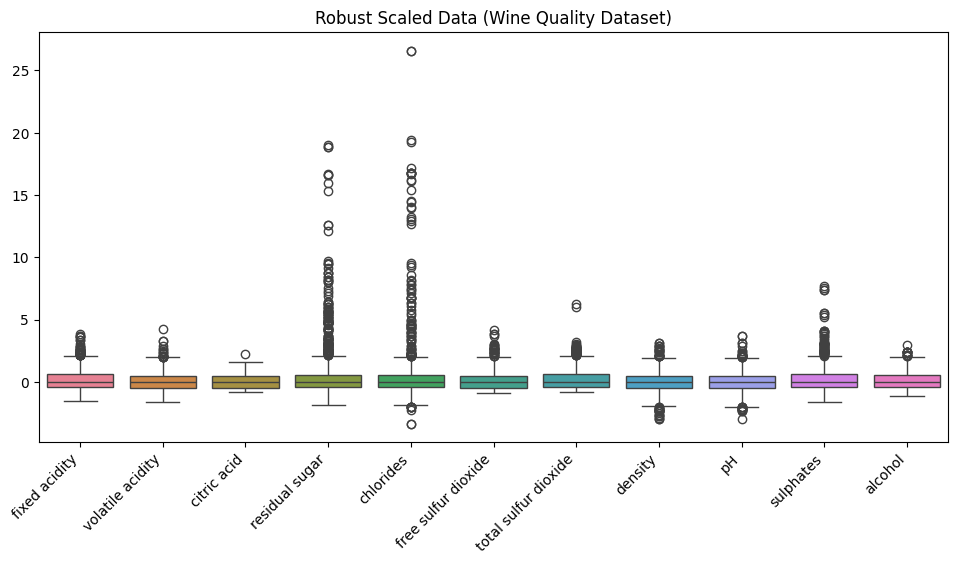

In [7]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Fit and transform the data
robust_scaled_data = scaler.fit_transform(df.drop('quality', axis=1))

# Convert to DataFrame
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=df.columns[:-1])

# Plot the Robust Scaled data
plt.figure(figsize=(10, 6))
sns.boxplot(data=robust_scaled_df)
plt.xticks(rotation=45, ha='right')
plt.title('Robust Scaled Data (Wine Quality Dataset)')
plt.tight_layout(pad=2)  # Add padding to ensure the labels are not cut off

plt.savefig('Robustscaled.png')
plt.show()


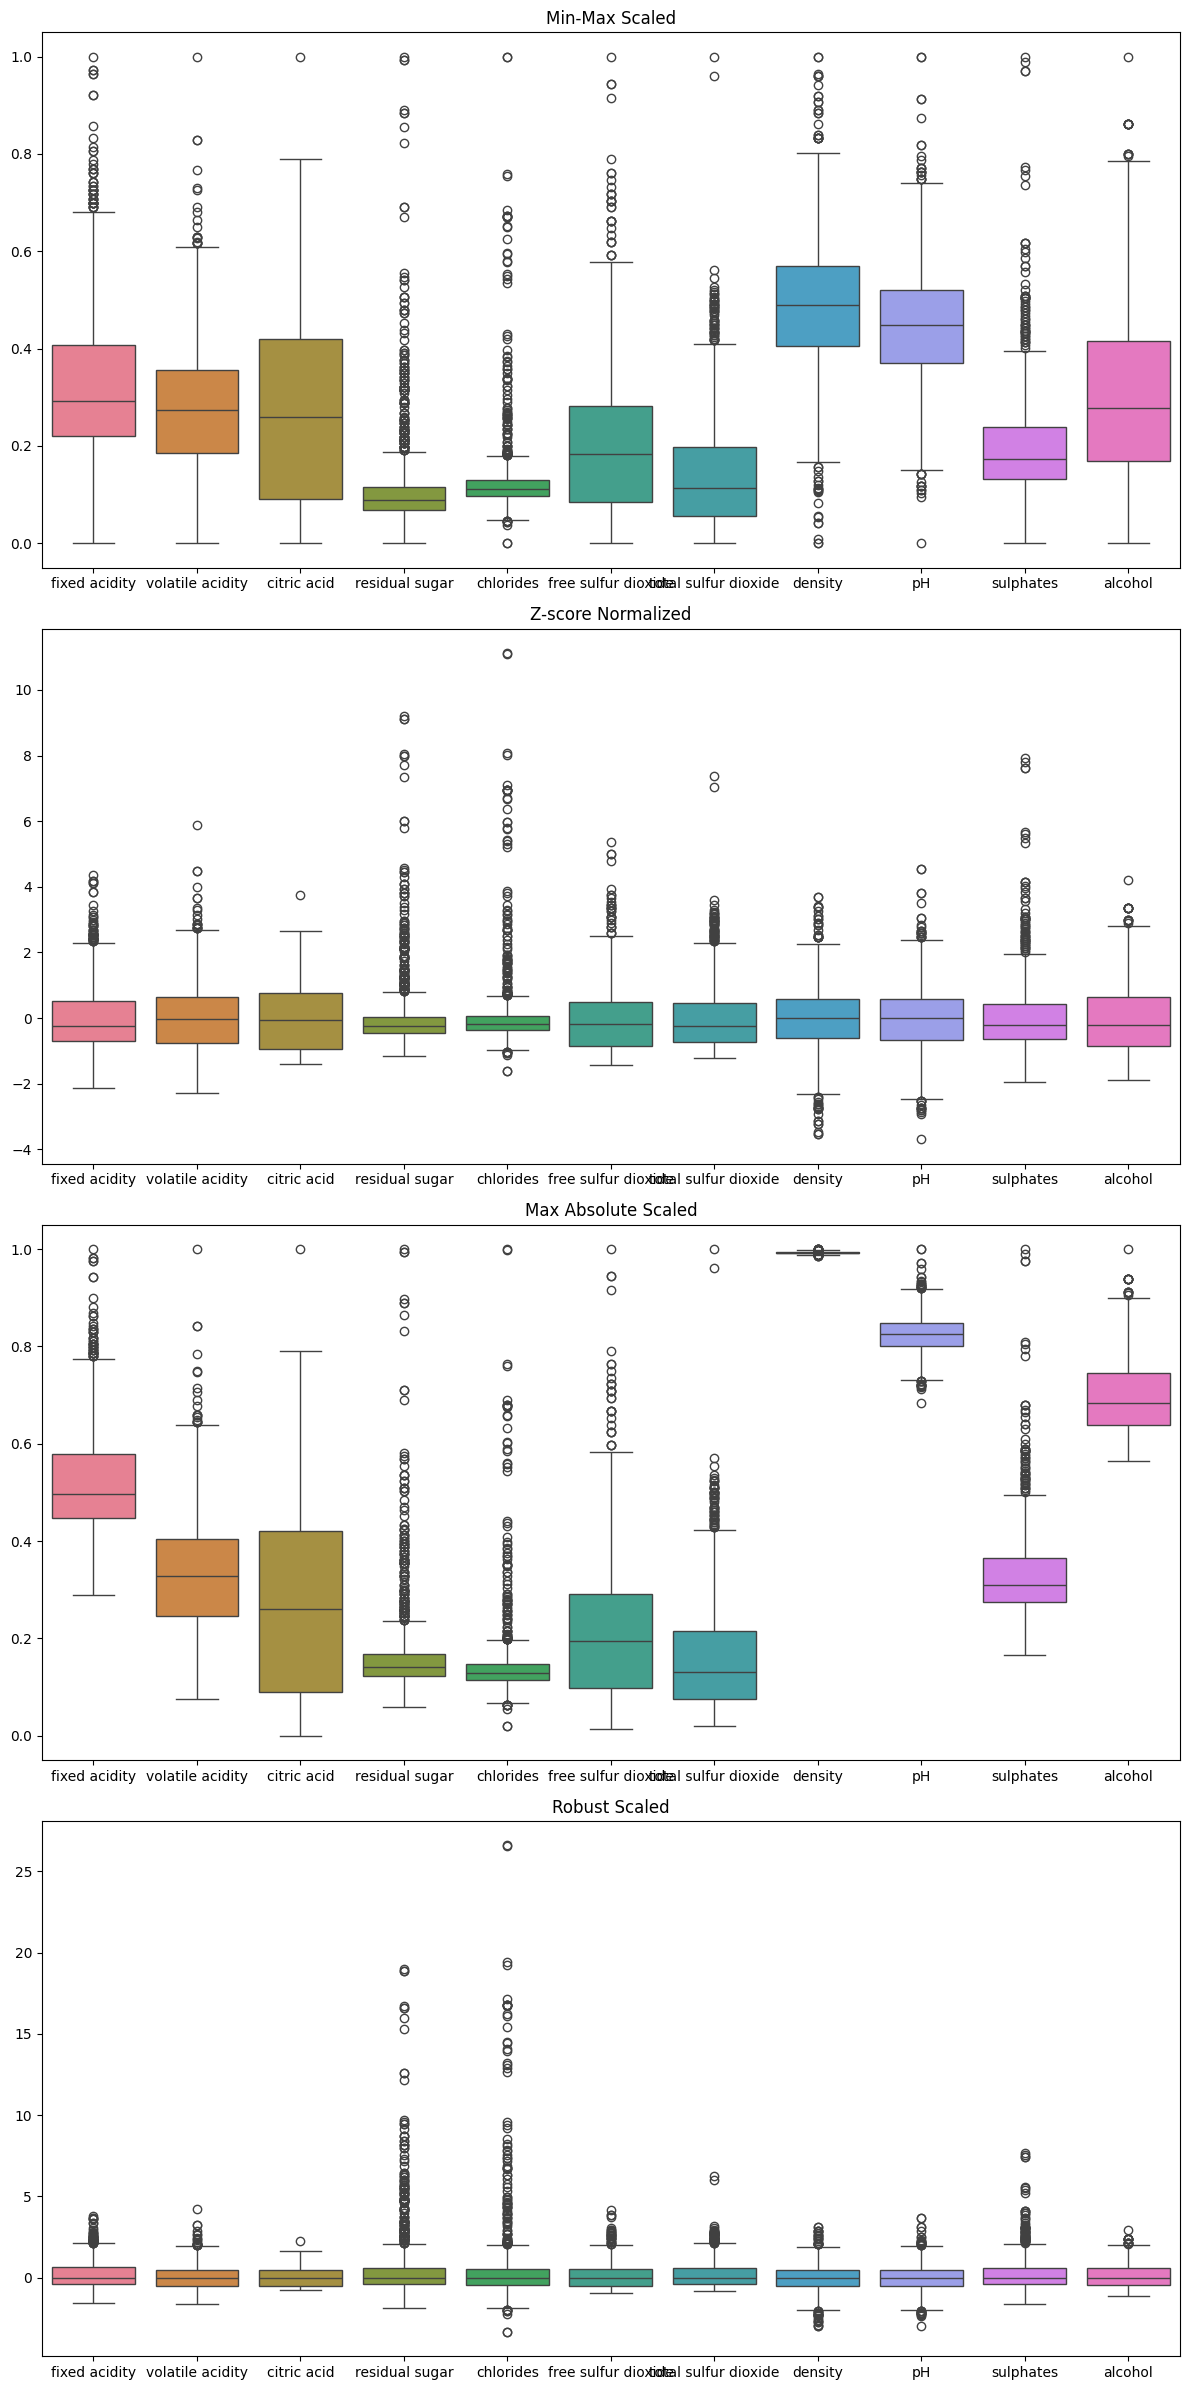

In [8]:
fig, axs = plt.subplots(4, 1, figsize=(12, 24))

# Min-Max Scaled
sns.boxplot(data=scaled_df, ax=axs[0])
axs[0].set_title('Min-Max Scaled')

# Z-score Normalized
sns.boxplot(data=z_scaled_df, ax=axs[1])
axs[1].set_title('Z-score Normalized')

# Max Absolute Scaled
sns.boxplot(data=maxabs_scaled_df, ax=axs[2])
axs[2].set_title('Max Absolute Scaled')

# Robust Scaled
sns.boxplot(data=robust_scaled_df, ax=axs[3])
axs[3].set_title('Robust Scaled')

plt.tight_layout()
plt.show()
